In [1]:
import yelpapi
import json
import requests
from  pprint import  pprint
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

counties=pd.read_csv("acs2015_county_data.csv")
counties["county_string"] = counties["County"] + " County, " + counties["State"]
listofcounties = counties["county_string"].tolist()
zipcodes=pd.read_csv("zip_codes_states.csv")
zipcodes["county_string"] = zipcodes["county"] + " County, " + zipcodes["state"]
listofzipcodes=zipcodes["county_string"].unique().tolist()
counties.to_csv("counties.csv")
zipcodes.to_csv("zcs.csv")
counties.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,county_string
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,"Autauga County, Alabama"
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,"Baldwin County, Alabama"
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,"Barbour County, Alabama"
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,"Bibb County, Alabama"
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,"Blount County, Alabama"


In [2]:
#comparing to other similar sized counties in the Southeast
#Charlotte, Raleigh, Atlanta, Memphis, Orlando
#comparing to other similar sized counties in other parts of the US
#Milwaukee, San Francisco, Austin, Pittsburgh

countieslist = ["Mecklenburg County, North Carolina",
                "Wake County, North Carolina", "Fulton County, Georgia", "Shelby County, Tennessee", "Orange County, Florida",
                "Milwaukee County, Wisconsin", "San Francisco County, California", "Travis County, Texas", "Allegheny County, Pennsylvania"]
countiescompare = counties[counties["county_string"].isin(countieslist)]
countiescompare
sample_list = countiescompare["county_string"].tolist()
sample_list

['San Francisco County, California',
 'Orange County, Florida',
 'Fulton County, Georgia',
 'Mecklenburg County, North Carolina',
 'Wake County, North Carolina',
 'Allegheny County, Pennsylvania',
 'Shelby County, Tennessee',
 'Travis County, Texas',
 'Milwaukee County, Wisconsin']

In [3]:
res_df = pd.DataFrame(columns=["name","zipcode","county_string","rating","review_count","category", "price"])
res_df

,name,zipcode,county_string,rating,review_count,category,price


In [4]:
r = 0
for c in sample_list:
    county_string = str(c)
    for term in ["Italian","Mexican","Chinese","American (Traditional)","American (New)","Indian"]:
        #we are allowed 5000 queries per 24 hours. if we run out, we can create another. till then, use this
        yelpkey="IXRN_1GI8f8J9Kj5O5GciqeyFSWR5RMh41_rADGy1KrtQ5ZABGGZEkWwot5mOka0NlzlNxXPmzYXLWk88oOV0N_YxD1MSW4kQRfJnFrwfHLtKrr2HcsjLo6uWBzAWnYx"
        try:
            offset=0
            for loopcount in range(3):
                
                response = requests.get(url="https://api.yelp.com/v3/businesses/search", 
                       params= {"location": county_string,"term": term, "limit":"50", "offset": offset}, 
                       headers={'Authorization': 'bearer %s' % yelpkey})
                responsejson = response.json()
                offset += 50
                try:
                    count=0
            
                    for x in range(0,49):
                        for y in range(0,len(responsejson["businesses"][x]["categories"])):
                            if ((responsejson["businesses"][x]["categories"][y]["title"]==term) and 
                                (responsejson["businesses"][x]["review_count"] > 0)):
                        
                                zc = int(responsejson["businesses"][x]["location"]["zip_code"])
                                if (zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0]== county_string):
                                    
                                
                                            
                                    
#                                      print("\n",responsejson["businesses"][x]["name"],
#                                           responsejson["businesses"][x]["location"]["zip_code"],
#                                           zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0],
#                                           responsejson["businesses"][x]["rating"],
#                                           responsejson["businesses"][x]["review_count"],
#                                           responsejson["businesses"][x]["categories"][y]["title"])
                                            
                            
                                    res_df.loc[r]=[responsejson["businesses"][x]["name"],
                                          zc,
                                          county_string,
                                          responsejson["businesses"][x]["rating"],
                                          responsejson["businesses"][x]["review_count"],
                                          term,
                                          responsejson["businesses"][x]["price"]]
                                            
                                    count += 1
                                    r += 1
                except:
                    break
    
                print("End of list. Found", count, term, "restaurants in", county_string)
        except:
            break


End of list. Found 48 Italian restaurants in San Francisco County, California
End of list. Found 46 Italian restaurants in San Francisco County, California
End of list. Found 49 Mexican restaurants in San Francisco County, California
End of list. Found 39 Chinese restaurants in San Francisco County, California
End of list. Found 35 Chinese restaurants in San Francisco County, California
End of list. Found 36 Chinese restaurants in San Francisco County, California
End of list. Found 48 American (New) restaurants in San Francisco County, California
End of list. Found 49 Indian restaurants in San Francisco County, California
End of list. Found 34 Mexican restaurants in Orange County, Florida
End of list. Found 31 Mexican restaurants in Orange County, Florida
End of list. Found 32 Chinese restaurants in Orange County, Florida
End of list. Found 26 Chinese restaurants in Orange County, Florida
End of list. Found 21 Chinese restaurants in Orange County, Florida
End of list. Found 27 Italian 

In [124]:
res_df.to_csv("output1804042050.csv")
##fill blanks with $$$$
res_df.price.replace(['$','$$','$$$','$$$$'], [1,2,3,4], inplace=True)

res_df.head()
# res_df["price"].value_counts()
# res_df2 = res_df['price'].fillna('$$$$')
# res_df2.head(55)

,name,zipcode,county_string,rating,review_count,category,price
0,Sotto Mare Oysteria & Seafood,94133,"San Francisco County, California",4.5,2998,Italian,2
1,Bella Trattoria,94118,"San Francisco County, California",4.0,1176,Italian,2
2,The Italian Homemade Company,94123,"San Francisco County, California",4.5,601,Italian,2
3,È Tutto Qua,94133,"San Francisco County, California",4.0,1840,Italian,2
4,Beretta,94110,"San Francisco County, California",4.0,3218,Italian,2


In [76]:
res_by_cat = res_df.groupby(['county_string','category'])['rating', 'price'].mean()
res_by_cat

rating
county_string                      category                        
Allegheny County, Pennsylvania     American (New)          4.236842
                                   American (Traditional)  4.166667
                                   Chinese                 4.250000
                                   Indian                  3.760870
                                   Italian                 4.044444
                                   Mexican                 4.285714
Fulton County, Georgia             Italian                 3.953704
Mecklenburg County, North Carolina American (New)          4.100000
                                   American (Traditional)  4.500000
                                   Chinese                 4.000000
                                   Indian                  3.911765
                                   Italian                 4.166667
                                   Mexican                 3.909091
Milwaukee County, Wisconsin        American (New)          4.238636
                                   American (Traditional)  4.000000
                                   Chinese                 3.471154
                                   Indian                  4.062500
                                   Italian                 3.753968
                                   Mexican                 4.194444
Orange County, Florida             American (Traditional)  4.120000
                                   Chinese                 3.556962
                                   Indian                  4.166667
                                   Italian                 4.166667
                                   Mexican                 4.065217
San Francisco County, California   American (New)          4.138889
                                   American (Traditional)  4.125000
                                   Chinese                 3.740909
                                   Indian                  3.895062
                                   Italian                 4.030435
                                   Mexican                 4.081633
Shelby County, Tennessee           American (New)          4.500000
                                   Chinese                 3.863636
                                   Indian                  3.900000
                                   Italian                 3.842105
                                   Mexican                 4.357143
Travis County, Texas               American (New)          4.200000
                                   American (Traditional)  4.388889
                                   Chinese                 3.744898
                                   Indian                  3.935897
                                   Italian                 4.059524
                                   Mexican                 4.500000
Wake County, North Carolina        American (New)          4.083333
                                   American (Traditional)  4.150000
                                   Chinese                 3.972973
                                   Indian                  3.964286
                                   Italian                 4.000000
                                   Mexican                 3.952055

In [62]:
itadf = res_df.groupby(res_df["category"]).get_group("Italian")
mexdf = res_df.groupby(res_df["category"]).get_group("Mexican")
chndf = res_df.groupby(res_df["category"]).get_group("Chinese")
ustdf = res_df.groupby(res_df["category"]).get_group("American (Traditional)")
usndf = res_df.groupby(res_df["category"]).get_group("American (New)")
inddf = res_df.groupby(res_df["category"]).get_group("Indian")

CHA = res_df.groupby(res_df["county_string"]).get_group("Mecklenburg County, North Carolina")
CHAbreakdown = pd.DataFrame(CHA["category"].value_counts()).T.reset_index()
CHAbreakdown["county_string"]="Mecklenburg County, North Carolina"
CHA_price_avg = CHA.groupby(res_df["price"]).mean()
CHA_price_count = CHA["price"].value_counts()

RAL = res_df.groupby(res_df["county_string"]).get_group("Wake County, North Carolina")
RALbreakdown = pd.DataFrame(RAL["category"].value_counts()).T.reset_index()
RALbreakdown["county_string"]="Wake County, North Carolina"
RAL_price_avg = RAL.groupby(res_df["price"]).mean()
RAL_price_count = RAL["price"].value_counts()

ATL = res_df.groupby(res_df["county_string"]).get_group("Fulton County, Georgia")
ATLbreakdown = pd.DataFrame(ATL["category"].value_counts()).T.reset_index()
ATLbreakdown["county_string"]="Fulton County, Georgia"
ATL_price_avg = ATL.groupby(res_df["price"]).mean()
ATL_price_count = ATL["price"].value_counts()

MEM = res_df.groupby(res_df["county_string"]).get_group("Shelby County, Tennessee")
MEMbreakdown = pd.DataFrame(MEM["category"].value_counts()).T.reset_index()
MEMbreakdown["county_string"]="Shelby County, Tennessee"
MEM_price_avg = MEM.groupby(res_df["price"]).mean()
MEM_price_count = MEM["price"].value_counts()


ORL = res_df.groupby(res_df["county_string"]).get_group("Orange County, Florida")
ORLbreakdown = pd.DataFrame(ORL["category"].value_counts()).T.reset_index()
ORLbreakdown["county_string"]="Orange County, Florida"
ORL_price_avg = ORL.groupby(res_df["price"]).mean()
ORL_price_count = ORL["price"].value_counts()

MIL = res_df.groupby(res_df["county_string"]).get_group("Milwaukee County, Wisconsin")
MILbreakdown = pd.DataFrame(MIL["category"].value_counts()).T.reset_index()
MILbreakdown["county_string"]="Milwaukee County, Wisconsin"
MIL_price_avg = MIL.groupby(res_df["price"]).mean()
MIL_price_count = MIL["price"].value_counts()

SFC = res_df.groupby(res_df["county_string"]).get_group("San Francisco County, California")
SFCbreakdown = pd.DataFrame(SFC["category"].value_counts()).T.reset_index()
SFCbreakdown["county_string"]="San Francisco County, California"
SFC_price_avg = SFC.groupby(res_df["price"]).mean()
SFC_price_count = SFC["price"].value_counts()

AUS = res_df.groupby(res_df["county_string"]).get_group("Travis County, Texas")
AUSbreakdown = pd.DataFrame(AUS["category"].value_counts()).T.reset_index()
AUSbreakdown["county_string"]="Travis County, Texas"
AUS_price_avg = AUS.groupby(res_df["price"]).mean()
AUS_price_count = AUS["price"].value_counts()

PIT = res_df.groupby(res_df["county_string"]).get_group("Allegheny County, Pennsylvania")
PITbreakdown = pd.DataFrame(PIT["category"].value_counts()).T.reset_index()
PITbreakdown["county_string"]="Allegheny County, Pennsylvania"
PIT_price_avg = PIT.groupby(res_df["price"]).mean()
PIT_price_count = PIT["price"].value_counts()



$$      87
$$$     11
$        8
$$$$     1
Name: price, dtype: int64

In [7]:
comp_df = pd.DataFrame(columns=["Italian","Mexican","Chinese","American (Traditional)","American (New)", "Indian","county_string"])
comp_df = comp_df.append(CHAbreakdown)
comp_df = comp_df.append(RALbreakdown)
comp_df = comp_df.append(ATLbreakdown)
comp_df = comp_df.append(MEMbreakdown)
comp_df = comp_df.append(ORLbreakdown)
comp_df = comp_df.append(MILbreakdown)
comp_df = comp_df.append(SFCbreakdown)
comp_df = comp_df.append(AUSbreakdown)
comp_df = comp_df.append(PITbreakdown)
comp_df = comp_df.reset_index()
del comp_df["index"]
del comp_df["level_0"]
#comp_df["Totals"]=comp_df["Italian"]+comp_df["Mexican"]+comp_df["Chinese"]+comp_df["Indian"]+comp_df["American (Traditional)"]+comp_df["American (New)"]
comp_df

,American (New),American (Traditional),Chinese,Indian,Italian,Mexican,county_string
0,20,1,14,17,3,55,"Mecklenburg County, North Carolina"
1,36,10,37,28,21,73,"Wake County, North Carolina"
2,NaN,NaN,NaN,NaN,54,NaN,"Fulton County, Georgia"
3,1,NaN,33,5,38,7,"Shelby County, Tennessee"
4,NaN,25,79,24,24,69,"Orange County, Florida"
5,44,11,52,16,63,18,"Milwaukee County, Wisconsin"
6,54,4,110,81,115,49,"San Francisco County, California"
7,5,9,49,39,42,1,"Travis County, Texas"
8,19,9,4,23,45,7,"Allegheny County, Pennsylvania"


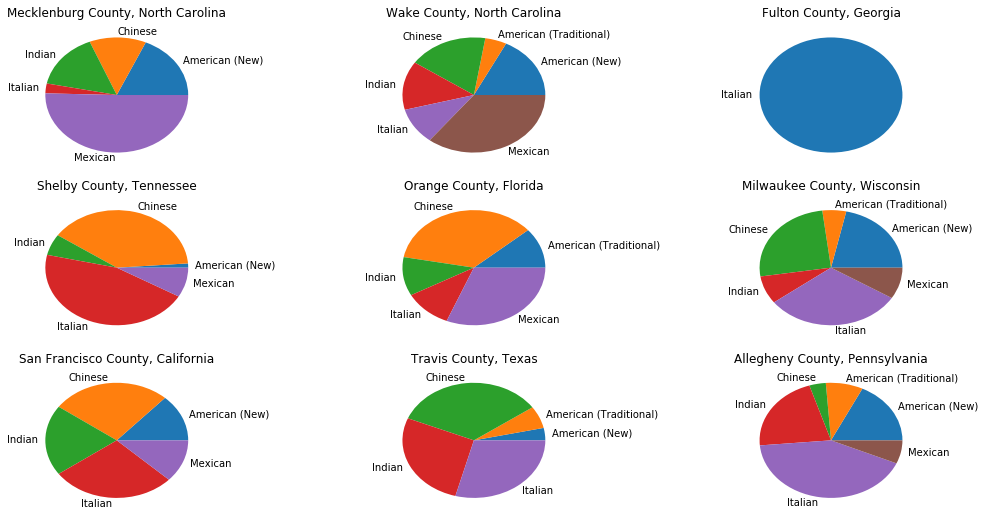

In [8]:
fig, axes = plt.subplots(3,3,figsize= (16, 9))
for i, (idx, row) in enumerate(comp_df.set_index("county_string").iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum()*.01)]
    ax.pie(row, labels=row.index)
    ax.set_title(idx)
fig.subplots_adjust(wspace=1)
plt.show()
fig.savefig("chart1.png")

In [43]:
#MIL.sort_values(["price"], ascending=False)
avg_price_df = pd.DataFrame(columns = ["county_string","rating", "price"])

# avg_price_df = avg_price_df.append(CHA_price_avg)
# avg_price_df =avg_price_df.append(RAL_price_avg)
# avg_price_df = avg_price_df.append(ATL_price_avg)
# avg_price_df = avg_price_df.append(MEM_price_avg)
# avg_price_df = avg_price_df.append(ORL_price_avg)
# avg_price_df = avg_price_df.append(MIL_price_avg)
# avg_price_df = avg_price_df.append(SFC_price_avg)
# cavg_price_df = avg_price_df.append(AUS_price_avg)
# avg_price_df = avg_price_df.append(PIT_price_avg)
# avg_price_df = avg_price_df.reset_index()
# avg_price_df = avg_price_df.fillna('$$$$')




Series([], Name: price, dtype: int64)

In [45]:
counter =0
for county in countieslist:
    if price == "$":
        counter = counter + 1
    else price == "$$":
        counter2 = counter2 +1
    else price =="$$$":
        counter3 = counter3 +1
    else price == "$$$$":
        counter4 = counter4 +1
    print(counter, counter2, counter3, counter4)

SyntaxError: invalid syntax (<ipython-input-45-1293b63df2f5>, line 5)

In [87]:
# count_price = pd.DataFrame(columns = ["category", "price"])

# count_price = count_price.append(CHA_price_count)
# count_price = count_price.append(RAL_price_count)
# count_price = count_price.append(ATL_price_count)
# count_price = count_price.append(MEM_price_count)
# count_price = count_price.append(ORL_price_count)
# count_price = count_price.append(MIL_price_count)
# count_price = count_price.append(SFC_price_count)
# count_price = count_price.append(AUS_price_count)
# count_price = count_price.append(PIT_price_count)
# count_price = count_price.reset_index()
# # avg_price_df = avg_price_df.fillna('$$$$')

# count_price.head()

In [125]:
res_by_price = res_df.groupby(['category', 'price'])['price'].count()
res_by_price

category                price
American (New)          1         10
                        2        120
                        3         42
                        4          7
American (Traditional)  1         14
                        2         50
                        3          5
Chinese                 1        204
                        2        172
                        4          2
Indian                  1         53
                        2        176
                        3          3
                        4          1
Italian                 1         17
                        2        328
                        3         57
                        4          3
Mexican                 1        129
                        2        150
Name: price, dtype: int64

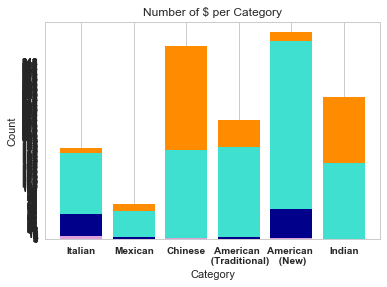

In [159]:
from matplotlib import rc
sns.set()
# orgPalette = sns.color_palette("Set2", len(res_by_price))
# sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':True})


# y-axis in bold
# rc('font', weight='bold')

figsize= (100, 100, 50)
 
# Values of each group
bars1 = [10,14,204,53,17,129]
bars2 = [120,50,172,176,328,150]
bars3 = [42,5,0,3,57,0]
bars4 = [7,0,2,1,3,0]
x = np.arange(len(bars1))


plt.bar(x, bars4, color="plum")
plt.bar(x, bars3, color="darkblue", bottom=bars4)
plt.bar(x, bars2, color="turquoise", bottom=list(map(lambda x,y: x+y, bars3,bars4)))
plt.bar(x, bars1, color="darkorange", bottom=list(map(lambda x,y,z: x+y+z, bars3,bars4,bars2)))

plt.xticks(x, ["Italian","Mexican","Chinese","American \n (Traditional)","American \n (New)", "Indian"])
plt.yticks(np.arange(350))

plt.grid(axis='y')
plt.xlabel("Category")
plt.ylabel('Count')
plt.title('Number of $ per Category')

plt.legend()


# Show graphic
plt.show()
plt.savefig("stacked.png")

In [ ]:
#res_by_price.plot.bar(
    
# res_by_price.plot(kind='bar', title ="Number of $ per Category", figsize=(15, 10), legend=True, fontsize=12)
# plt.xlabel("Category")
# plt.ylabel("Count")
# plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.3

conditions = np.unique(res_by_price[:,0])
categories = np.unique(res_by_price[:,1])

n = len(conditions)

width = (1 - space) / (len(conditions))
print ("width:", width)

for i,cond in enumerate(conditions):
    print ("cond:", cond)
    vals = res_by_price[res_by_price[:,0] == cond][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width for j in range(1,len(categories)+1)]
    ax.bar(pos, vals, width=width)

In [151]:
sns.set()
orgPalette = sns.color_palette("Set2")
# sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':True})

sns.factorplot(x=["Italian","Mexican","Chinese","American \n (Traditional)","American \n (New)", "Indian"], 
               y=np.arange(50), palette=orgPalette, kind='bar', data=res_by_price)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

In [ ]:
comp = pd.DataFrame(res_df["category"].groupby(res_df["county_string"]).value_counts())
comp
#I HAVE NO IDEA WHAT TO DO WITH THIS

In [ ]:
CHA = CHA["category"].value_counts().reset_index()
CHA["county_string"]="Mecklenburg County, North Carolina"
CHA.columns = ["category","count","county_string"]
CHA